<a href="https://colab.research.google.com/github/iskalinov13/NLP-course/blob/main/LAB_3_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting the Data

We have a csv file from the Donald Trump's twitter in the same folder as our notebook

In [ ]:
# Task 3
# 1. Load text of Abay's words of edification
# 2. Create 3 and 4-grams model
# 3. Show frequent word's combinations
# 4. Visualize the word's combinations

In [2]:
import pandas as pd
from google.colab import drive
drive.mount("/drive") 


Mounted at /drive


In [3]:
df = pd.read_csv('/drive/My Drive/Colab Notebooks/tweets.csv')
df['text'].head(5)

0                       LOSER! https://t.co/p5imhMJqS1
1    Most of the money raised by the RINO losers of...
2    ....because they don’t know how to win and the...
3    ....lost for Evan “McMuffin” McMullin (to me)....
4    ....get even for all of their many failures. Y...
Name: text, dtype: object

In [87]:
# 1. Load text of Abay's words of edification
df_abai = pd.read_fwf('/drive/My Drive/Colab Notebooks/Abai.txt', delimiter = '\r')
df_abai = df_abai.values.tolist()
df_abai[:20]

[['Бұл жасқа келгенше жақсы өткіздік пе, жаман өткіздік пе, әйтеуір бірталай өмірімізді өткіздік: алыстық, жұлыстық, айтыстық, тартыстық - әурешілікті көре-көре келдік. Енді жер ортасы жасқа келдік: қажыдық, жалықтық; қылып жүрген ісіміздің баянсызын, байлаусызын көрдік, бәрі қоршылық екенін білдік. Ал, енді қалған өмірімізді қайтіп, не қылып өткіземіз? Соны таба алмай өзім де қайранмын.'],
 ['Ел бағу? Жоқ, елге бағым жоқ. Бағусыз дертке ұшырайын деген кісі бақпаса, не албыртқан, көңілі басылмаған жастар бағамын демесе, бізді құдай сақтасын!'],
 ['Мал бағу? Жоқ, баға алмаймын. Балалар өздеріне керегінше өздері бағар. Енді қартайғанда қызығын өзің түгел көре алмайтұғын, ұры, залым, тілемсектердің азығын бағып беремін деп, қалған аз ғана өмірімді қор қылар жайым жоқ.'],
 ['Ғылым бағу? Жоқ, ғылым бағарға да ғылым сөзін сөйлесер адам жоқ. Білгеніңді кімге үйретерсің, білмегеніңді кімнен сұрарсың? Елсіз-күнсізде кездемені жайып салып, қолына кезін алып отырғанның не пайдасы бар? Мұңдасып ше

In [17]:
#2. Create 3 and 4-grams model
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

ADDITIONAL_STOPWORDS = ['де']

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [82]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('kazakh') + ADDITIONAL_STOPWORDS
    
    text = text.lower()
    words = re.sub(r'[^\w\s]', '', text).split()

    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [90]:
# 3-gram model

word = basic_clean(str(df_abai))
word_abai = basic_clean(str(df_abai))
n3_gram = pd.Series(nltk.ngrams(word_abai, 3))
print(n3_gram)

0                    (жасқа, келгенше, жақсы)
1                 (келгенше, жақсы, өткіздік)
2                       (жақсы, өткіздік, пе)
3                       (өткіздік, пе, жаман)
4                       (пе, жаман, өткіздік)
                         ...                 
13488     (ескі, патшалардыңсарқыты, кәсірәй)
13489    (патшалардыңсарқыты, кәсірәй, ғажам)
13490                 (кәсірәй, ғажам, жұрты)
13491                (ғажам, жұрты, қазақтың)
13492               (жұрты, қазақтың, амудар)
Length: 13493, dtype: object


In [91]:
#4-gram model

n4_gram = pd.Series(nltk.ngrams(word, 4))
print(n4_gram)

0                    (жасқа, келгенше, жақсы, өткіздік)
1                       (келгенше, жақсы, өткіздік, пе)
2                          (жақсы, өткіздік, пе, жаман)
3                       (өткіздік, пе, жаман, өткіздік)
4                             (пе, жаман, өткіздік, пе)
                              ...                      
13487    (дүниедегі, ескі, патшалардыңсарқыты, кәсірәй)
13488        (ескі, патшалардыңсарқыты, кәсірәй, ғажам)
13489       (патшалардыңсарқыты, кәсірәй, ғажам, жұрты)
13490                 (кәсірәй, ғажам, жұрты, қазақтың)
13491                  (ғажам, жұрты, қазақтың, амудар)
Length: 13492, dtype: object


In [92]:
# 3. Show frequent word's combinations
n3_gram.value_counts()[:20]

(екеуі, қалай, таласады)               6
(болар, ма, екен)                      4
(бірімізді, біріміз, аңдып)            4
(бірдей, болмайды, екі)                3
(аз, ба, көп)                          3
(болса, екен, деп)                     3
(пайғамбарымыз, салаллаһу, ғалайһи)    3
(еңбек, қылып, мал)                    3
(да, неше, түрлі)                      3
(болса, бағанағы, екі)                 3
(не, ахиретке, не)                     3
(ба, көп, пе)                          3
(жә, олай, болса)                      3
(тулап, кететұғын, әділет)             2
(ләззат, алар, едік)                   2
(жақсылыққа, елжіреп, еритұғын)        2
(ақылы, кісіге, иман)                  2
(елжіреп, еритұғын, жаманшылықтан)     2
(кісіге, иман, парыз)                  2
(еритұғын, жаманшылықтан, жиреніп)     2
dtype: int64

In [93]:
# 3. Show frequent word's combinations
n4_gram.value_counts()[:20]

(аз, ба, көп, пе)                         3
(үйде, тамағы, тоқ, жатқан)               2
(тірлік, жұмсақ, төсекте, жылы)           2
(төсекте, жылы, үйде, тамағы)             2
(жылы, үйде, тамағы, тоқ)                 2
(сені, бүйтіп, сүйеймін, деп)             2
(жұрттың, қоры, болып, бірімізді)         2
(тамағы, тоқ, жатқан, кісіге)             2
(тоқ, жатқан, кісіге, төсексіз)           2
(жатқан, кісіге, төсексіз, кедейдің)      2
(кісіге, төсексіз, кедейдің, тоңып)       2
(төсексіз, кедейдің, тоңып, жүрген)       2
(кедейдің, тоңып, жүрген, киімсіздің)     2
(тоңып, жүрген, киімсіздің, тамақсыз)     2
(жүрген, киімсіздің, тамақсыз, аштың)     2
(киімсіздің, тамақсыз, аштың, күйжәйі)    2
(тамақсыз, аштың, күйжәйі, қандай)        2
(аштың, күйжәйі, қандай, болып)           2
(күйжәйі, қандай, болып, жатыр)           2
(қандай, болып, жатыр, екен)              2
dtype: int64

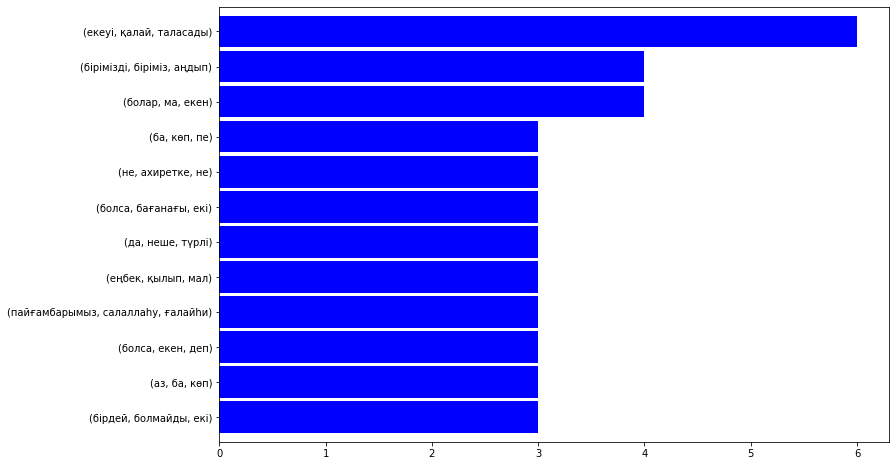

In [95]:
# 4. Visualize the word's combinations
bigrams_series = (pd.Series(nltk.ngrams(word, 3)).value_counts())[:12]
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))